## The Ferromagnetic Ising model ##

* Libraries

In [1]:
using Pkg; Pkg.activate("."); Pkg.instantiate()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...


In [2]:
using Distributions, LinearAlgebra
using Plots; pyplot(); default(legendfontsize = 15.0, linewidth = 2.0)
using Random

* InitialState is checked

In [3]:
function InitialState(N)  # Generates an initial state with all values fixed to +1 and -1
    state = zeros(3, N, N)
    for i in 1:N
        for j in 1:N
            state[1, i, j] = 1
            state[2, i, j] = -1
        end
    end
    return state
end

InitialState (generic function with 1 method)

* Calculate the energy difference

In [4]:
function calcEnergyDiff(i, j, state)  # Calculate the energy at flipping the vertex at [i,j]
    m = size(state, 2)
    if i == 1
        top = 1
    else
        top = state[i - 1, j]
    end
    if i == m
        bottom = 1
    else
        bottom = state[i + 1, j]
    end
    if j == 1
        left = 1
    else
        left = state[i, j - 1]
    end
            
    if j == m
        right = 1
    else
        right = state[i, j + 1]
    end

    energy = 2 * state[i,j] * sum([top, bottom, left, right])  # Energy calculated by given formula
                
    return energy
end
    


calcEnergyDiff (generic function with 1 method)

* Update State for Ising Model

In [5]:
function updateState(t, state, U)
    B = 1 / T
    E = zeros(3)

    i = Int(U[2,Int(-t)])  # Picks a random vertex, the same each time the chain runs from 0
    j = Int(U[3,Int(-t)])
    if U[2,-t] == 0.0

    end
    for h in 1:3

        E[h] =  calcEnergyDiff(i, j, state[h,:,:])  # Find energy under randomly generated flip of each state space separately

        u = U[1,Int(-t)]
        if state[h, i, j] == 1
            u = 1 - u
        end
        if u < 0.5 * (1 - tanh(0.5 * B * E[h]))  # condition to accept change, random number is the same each time
            state[h, i, j] = -state[h,i,j]
            #n[h]=1
        else
            state[h, i, j] = state[h, i, j]
            #n[h]=0
        end
    end


    return state  # returns both states
end

updateState (generic function with 1 method)

* Run Ising Model

In [6]:
function runIsing(t, state, U)  # Runs chain from the designated starting time until time 0

    while t < 0
        state = updateState(t, state, U)
        t += 1
    end
    return state
end

runIsing (generic function with 1 method)

## Propp Wilson Algorithm

* Generate and store random numbers

In [7]:
function genRandomness(N, M)  # generate and store three sets of random numbers
    U = zeros(3, M)

    U[2,:] = rand(1:N, M) # Random numbners i
    U[3,:] = rand(1:N, M)  # Random numbners j
    for i in 1:M
        U[1,i] = rand()  # Random numbners U
    end
    println(size(U))
    return U
end

genRandomness (generic function with 1 method)

In [8]:
genRandomness(50,4)

(3, 4)


3×4 Array{Float64,2}:
  0.820278   0.504889   0.522816   0.6426
 25.0       34.0       15.0       45.0   
 10.0       37.0       16.0        8.0   

* Generate starting times

In [9]:
function genStartingTimes(j)  # Creates starting times, each one is double the previous
    M = zeros(j)
    M[2] = 1
    for x in 3:j
        M[x] = 2 * M[x - 1]
    end       
    return M
end

genStartingTimes (generic function with 1 method)

* Propp Wilson Algorithm

In [36]:
function runProppWilson(N,j)
    M = genStartingTimes(j)
    U = genRandomness(N, 1)
    state = InitialState(N)
    m=2
    while state[1] != state[2]  # Condition for termination: both state spaces are the same
        U = hcat(U,genRandomness(N, Int(M[m] - M[m-1]))) # Generates more random numbers when necessary
        magnetization = sum([sum(i) for i in state[1]])-sum([sum(i) for i in state[2]])
        println("magnetization= ",magnetization, "round= ", m)
        state = runIsing(-Int(M[m]), state,U )
        m += 1  # If states are not the same, goes to the next starting time
    end
    return state[1,:,:]
end

runProppWilson (generic function with 1 method)

[0.0657474 0.628528; 0.141948 0.780599; 0.051339 0.337307; 0.763701 0.633806; 0.0182936 0.809531; 0.896215 0.0548162; 0.184787 0.851854; 0.141797 0.686252; 0.779549 0.991568; 0.12287 0.149822]


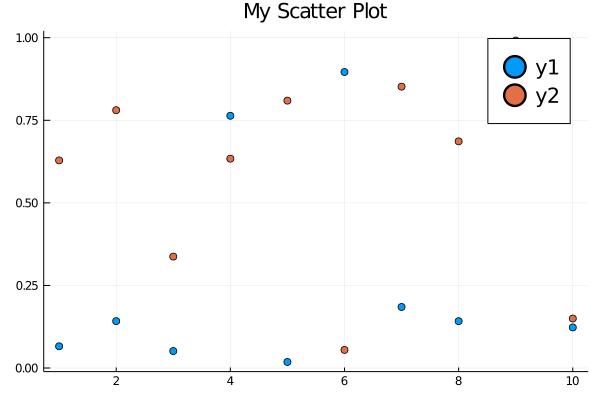

In [79]:
using Plots
pyplot()

gr() # We will continue onward using the GR backend


## Graph ##

In [118]:
function Graph(N, j)
    state = runProppWilson(N, j)
    println(size(state))
    S = size(state)[2]  # Takes the size of the matrix
    println("Plotting!")
    count1 = 0 
    count2 = 0
    for i in 1:S
        for j in 1:S
            if state[i,j] == 1  # Graphs a red + if the matrix entry is positive
                count1+=1
            elseif state[i,j] == -1
                count2 = count2+1
            end
        end
    end
    println(count1)
    println(count2)
end


Graph (generic function with 1 method)

* Show Results

In [121]:
T = 2  # Temperature
Graph(50, 40) # Obtain a sample in a N x N grid


(3, 1)
(3, 1)
magnetization= 2.0round= 2
(3, 1)
magnetization= 2.0round= 3
(3, 2)
magnetization= 2.0round= 4
(3, 4)
magnetization= 2.0round= 5
(3, 8)
magnetization= 2.0round= 6
(3, 16)
magnetization= 2.0round= 7
(3, 32)
magnetization= 2.0round= 8
(3, 64)
magnetization= 2.0round= 9
(3, 128)
magnetization= 2.0round= 10
(3, 256)
magnetization= 2.0round= 11
(3, 512)
magnetization= 2.0round= 12
(50, 50)
Plotting!
2485
15
